In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [11]:
df.fillna(df.mean(),inplace=True)

In [64]:
x=df.drop("student_marks",axis="columns")
y=df.drop("study_hours",axis="columns")

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression

In [99]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_pred=regressor.predict(x_test)

In [82]:
np.set_printoptions(precision=2)

In [98]:
np.concatenate((y_pred,y_test),axis=1)

array([[83.51, 82.5 ],
       [70.85, 71.18],
       [72.93, 73.25],
       [85.35, 83.64],
       [73.21, 73.64],
       [84.49, 86.99],
       [80.12, 81.18],
       [81.85, 82.75],
       [80.91, 79.5 ],
       [82.21, 81.7 ],
       [78.99, 79.41],
       [84.84, 85.95],
       [77.85, 77.19],
       [77.69, 78.45],
       [83.23, 84.  ],
       [85.78, 85.46],
       [84.96, 84.35],
       [72.62, 73.19],
       [78.71, 78.21],
       [79.18, 77.59],
       [84.29, 83.87],
       [85.63, 85.15],
       [74.74, 72.96],
       [81.34, 80.72],
       [72.03, 73.61],
       [80.4 , 79.53],
       [78.99, 78.17],
       [82.09, 79.63],
       [77.95, 76.83],
       [82.25, 82.38],
       [75.45, 76.04],
       [84.61, 85.48],
       [71.64, 71.87],
       [75.49, 75.04],
       [70.3 , 70.67],
       [78.99, 79.87],
       [75.33, 74.49],
       [84.53, 84.19],
       [74.07, 75.36],
       [71.44, 72.1 ]])

In [101]:
regressor.predict([[5]])

array([[70.1]])

In [102]:
m=regressor.coef_

In [103]:
c=regressor.intercept_

In [104]:
print(m*5+c)

[[70.1]]


In [105]:
dataframe=pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","og_marks","pred_marks"])

In [106]:
dataframe

,study_hours,og_marks,pred_marks
0,8.410000,82.50,83.505073
1,5.190000,71.18,70.849272
2,5.720000,73.25,72.932370
3,8.880000,83.64,85.352348
4,5.790000,73.64,73.207496
5,8.660000,86.99,84.487666
6,7.550000,81.18,80.124952
7,7.990000,82.75,81.854316
8,7.750000,79.50,80.911027
9,8.080000,81.70,82.208050


In [121]:
regressor.score(x_test,y_test)

0.9521841793508594

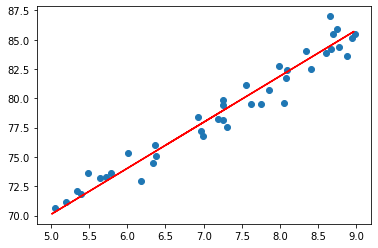

In [119]:
plt.scatter(x_test,y_test)
plt.plot(x_train,regressor.predict(x_train),color="red")
plt.show()